# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    



### Importing the data

In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df.isna().sum() 

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [3]:
#converting TotalCharges to float 
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"])
df["TotalCharges"]=df["TotalCharges"].astype(float)
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#df = df.reset_index()
#df["TotalCharges"]=df.fillna(df["TotalCharges"].mean())
for c in df["TotalCharges"]:
    df["TotalCharges"] = df["TotalCharges"].replace(np.nan, df["TotalCharges"].mean())

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Converting the categorical columns into numerical columns

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df["gender"]=le.fit_transform(df["gender"])
df["Partner"]=le.fit_transform(df["Partner"])
df["Dependents"]=le.fit_transform(df["Dependents"])
df["PhoneService"]=le.fit_transform(df["PhoneService"])
df["MultipleLines"]=le.fit_transform(df["MultipleLines"])
df["InternetService"]=le.fit_transform(df["InternetService"])
df["OnlineSecurity"]=le.fit_transform(df["OnlineSecurity"])
df["OnlineBackup"]=le.fit_transform(df["OnlineBackup"])
df["DeviceProtection"]=le.fit_transform(df["DeviceProtection"])
df["TechSupport"]=le.fit_transform(df["TechSupport"])
df["StreamingTV"]=le.fit_transform(df["StreamingTV"])
df["StreamingMovies"]=le.fit_transform(df["StreamingMovies"])
df["PaperlessBilling"]=le.fit_transform(df["PaperlessBilling"])
df["TechSupport"]=le.fit_transform(df["TechSupport"])
df["PaymentMethod"]=le.fit_transform(df["PaymentMethod"])
df["Churn"]=le.fit_transform(df["Churn"])
df["Contract"]=le.fit_transform(df["Contract"])

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [9]:
df.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

### Checking for constant, quasi-constant and primary key columns

In [10]:
df.shape

(7043, 21)

In [11]:
df['customerID'].nunique()

7043

In [12]:
#dropping customer id since it is a primary key
df=df.drop('customerID',axis=1)

In [13]:
df['gender'].value_counts()/7043

1    0.504756
0    0.495244
Name: gender, dtype: float64

Gender column is equally distributed.

In [14]:
df['SeniorCitizen'].value_counts()/7043

0    0.837853
1    0.162147
Name: SeniorCitizen, dtype: float64

In [15]:
df['Partner'].value_counts()/7043

0    0.516967
1    0.483033
Name: Partner, dtype: float64

In [16]:
df['Dependents'].value_counts()/7043

0    0.700412
1    0.299588
Name: Dependents, dtype: float64

### Understanding the data

In [17]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


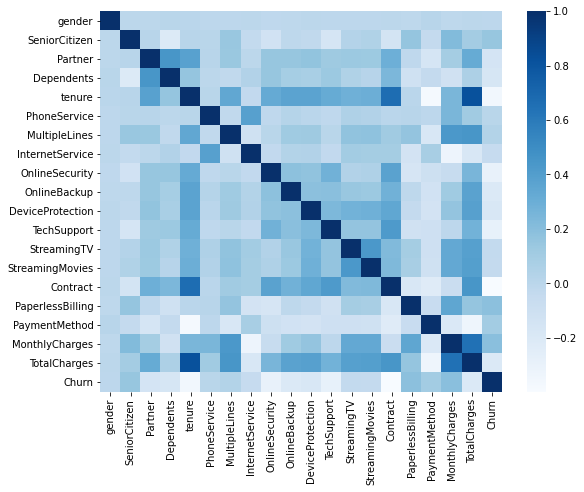

In [18]:
#plotting the heatmap
fig,ax=plt.subplots(figsize=(9,7))
sns.heatmap(df.corr(),cmap="Blues")
sns.set()

Outlier detection

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


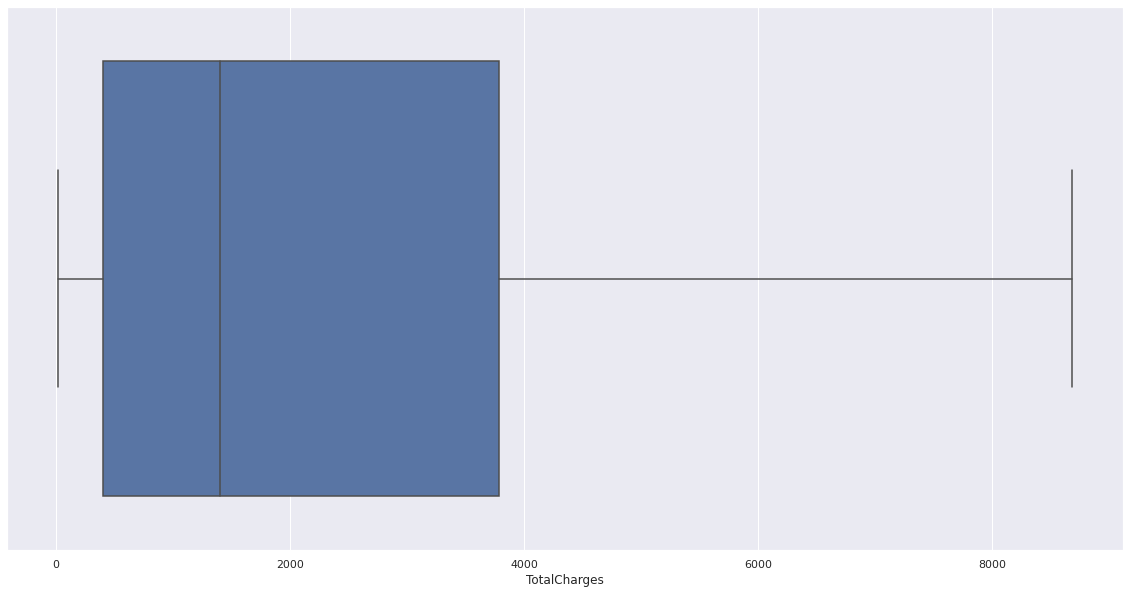

In [19]:
plt.figure(figsize=(20,10))
sns.boxplot(df["TotalCharges"])
plt.show()
#No outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


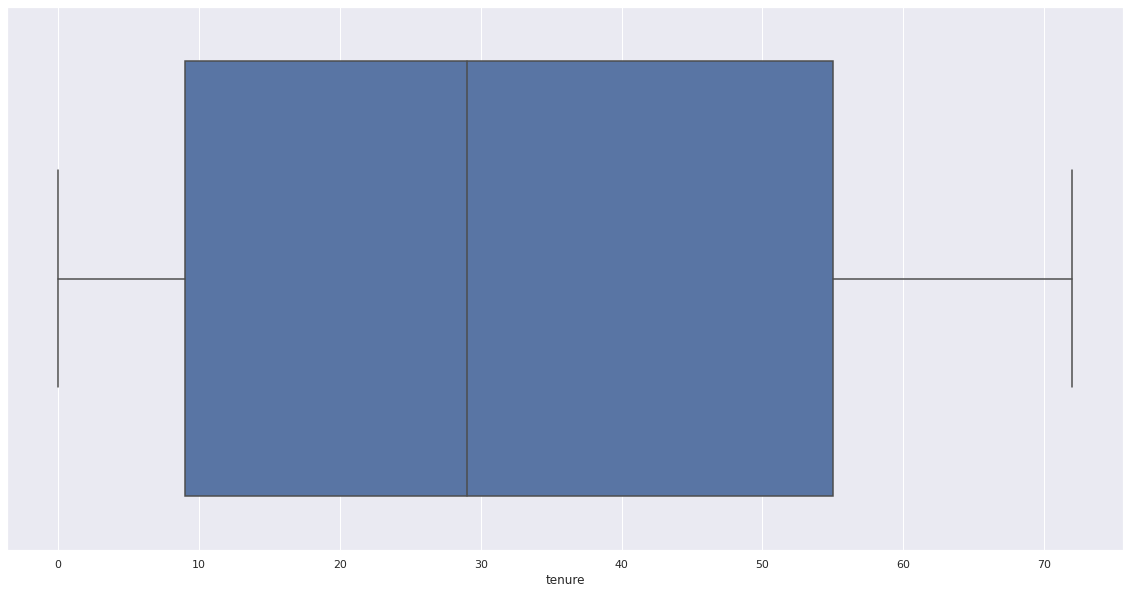

In [20]:
plt.figure(figsize=(20,10))
sns.boxplot(df["tenure"])
plt.show()
#No outliers

### Data Visualization and Data Manipulation

Text(0, 0.5, 'tenure')

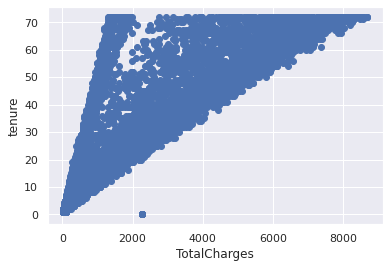

In [21]:
# create a figure and axis
fig, ax = plt.subplots()

ax.scatter(df['TotalCharges'], df['tenure'])
# set a title and labels
ax.set_xlabel('TotalCharges')
ax.set_ylabel('tenure')

There is a high correlation between tenure and TotalCharges, as it is indicated by the heatmap as well as the scatterplot. Hence we are going to drop TotalCharges.

In [22]:
df=df.drop("TotalCharges",axis=1)

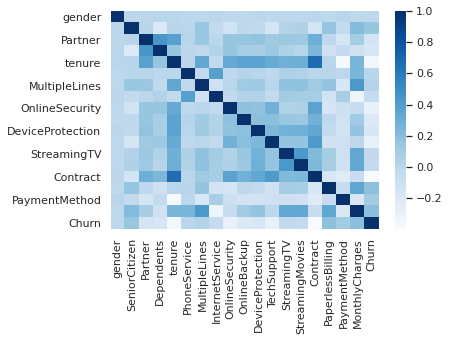

In [23]:
sns.heatmap(df.corr(),cmap="Blues")

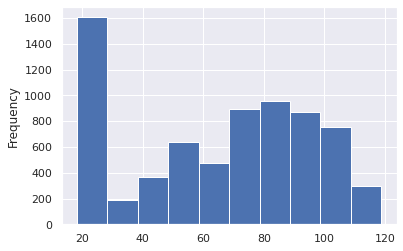

In [24]:
df["MonthlyCharges"].plot.hist()

-0.22052443394398033


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


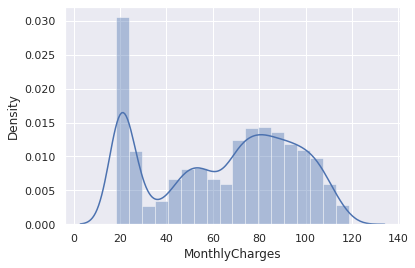

In [25]:
print(df["MonthlyCharges"].skew())
sns.distplot(df["MonthlyCharges"])

-0.48455701260718537


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


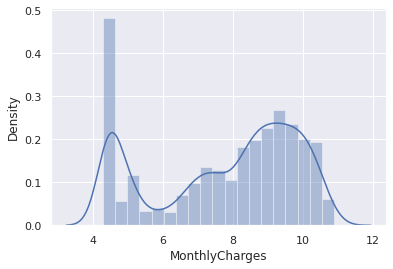

In [27]:
y = np.sqrt(df["MonthlyCharges"])
print(y.skew())
sns.distplot(np.sqrt(df["MonthlyCharges"])) #No improvement

-0.7289749716031325


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


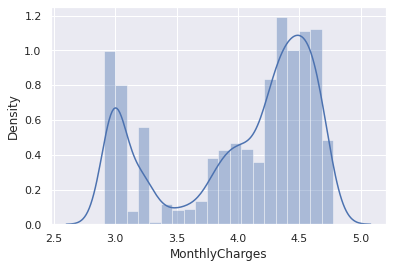

In [28]:
x = np.log(df["MonthlyCharges"])
print(x.skew())
sns.distplot(np.log(df["MonthlyCharges"])) #No improvement

-0.26389712986757285


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


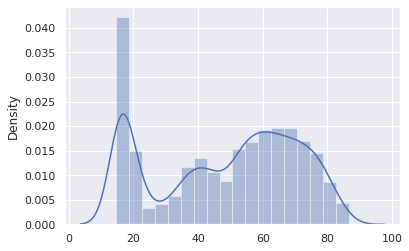

In [29]:
from scipy import stats
x2 = stats.boxcox(df["MonthlyCharges"])[0]
x3 = pd.Series(x2)
print(x3.skew())
sns.distplot(x2) #No improvement

### Normalization of data

In [30]:
from sklearn.preprocessing import MinMaxScaler

mm=MinMaxScaler()
df_scaled=mm.fit_transform(df)
df_scaled=pd.DataFrame(data=df_scaled,columns=df.columns)
df_scaled.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.0
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.0
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,1.0
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.0
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,1.0


### Splitting our data

In [31]:
X=df_scaled.drop("Churn",axis=1)
y=df_scaled["Churn"]

In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=df_scaled["Churn"],random_state=21)

In [33]:
(X_train.shape,y_train.shape)

((5634, 18), (5634,))

In [34]:
(X_test.shape,y_test.shape)

((1409, 18), (1409,))

### Processing our ML Models




Stochastic Gradient Descent Classifier

In [35]:
from sklearn.linear_model import SGDClassifier

sgd_c=SGDClassifier()
sgd_c.fit(X_train,y_train)
print("Training complete.")

Training complete.


SVM Classifier

In [36]:
from sklearn import svm

support = svm.LinearSVC(random_state=20)
support.fit(X_train,y_train)
print("Training complete.")

Training complete.


### Ensemble Learning




Bagging Classifier

In [37]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model_bg = BaggingClassifier(tree.DecisionTreeClassifier(random_state=10))
model_bg.fit(X_train, y_train)
print("Training complete.")

Training complete.


XGBoostClassifier

In [38]:
import xgboost as xgb
model_xgb=xgb.XGBClassifier(random_state=10,learning_rate=0.01)
model_xgb.fit(X_train, y_train)
print("Training complete.")

Training complete.


Gradient Boosting Classifier

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
model_gbc= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model_gbc.fit(X_train, y_train)
print("Training complete.")

Training complete.


RandomForest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
cf=RandomForestClassifier()
cf.fit(X_train,y_train)
print("Training complete.")

Training complete.


### Model Evaluation

Stochastic Gradient Descent Classifier

In [41]:
sgd_c.score(X_test,y_test)*100

79.13413768630234

SVM Classifier

In [42]:
support.score(X_test,y_test)*100

80.34066713981547

Bagging Classifier

In [43]:
model_bg.score(X_test,y_test)*100

76.93399574166075

XGBoost Classifier

In [44]:
model_xgb.score(X_test,y_test)*100

78.56635911994321

In [45]:
model_gbc.score(X_test,y_test)*100

77.2888573456352

In [46]:
cf.score(X_test,y_test)*100

77.43080198722498

### Final Conclusion

We can see that with this data, the *Linear Support Vector Classifier* works best, with a score of **80.34%**. Hence, we will use this ML model for deployment. The cells below include a final analysis of the ROC Score of the model:

In [47]:
y_pred=support.predict(X_test)

In [48]:
unique_elements, counts_elements = np.unique(y_pred, return_counts=True)

for i in range(0,2):
  print(f"{unique_elements[i]}:{counts_elements[i]}")

0.0:1100
1.0:309


In [49]:
predict_prob=support._predict_proba_lr(X_test)
from sklearn.metrics import roc_curve, roc_auc_score
fpr1, tpr1, thresh1 = roc_curve(y_test, predict_prob[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [50]:
auc_score1 = roc_auc_score(y_test, predict_prob[:,1])
print(auc_score1)

0.8374693223798082


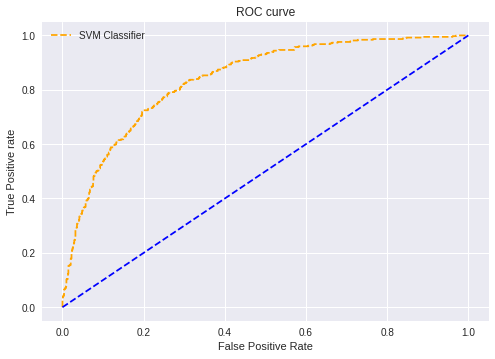

In [51]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='SVM Classifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()